In [3]:
import sys
sys.path.append('Scripts')

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, utils, datasets, models
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from utils import path
from DataVis import createInputFigure

from sklearn import preprocessing
import os
import time
import copy

In [3]:
%load_ext autoreload
%autoreload 2

***

#### Auxiliary Functions

In [4]:
def barPlot(table):
    models = table.loc[:]['model']
    best_val_acc = table.loc[:]['best val acc']
    
    N = len(models)
    ind = np.arange(N)
    
    plt.style.use('ggplot')
    fig, ax = plt.subplots()
    
    fig.set_size_inches(12, 5)
    plt.xticks(ind, models, rotation = 25, size = 14)
    plt.yticks(size = 15)
    
    ax.bar(ind, best_val_acc, color = 'slateblue', width = 0.5)
    
    
def buildTable(picType, dataType):
    dataPath = path('Models\\'+picType)
    modelsTitles = os.listdir(dataPath())[1:]
    table = pd.DataFrame(index = range(len(modelsTitles)), columns = ['model', 'best val acc', 'best val loss', 'training acc', 'training loss'])

    for model, k in zip(modelsTitles, list(range(len(modelsTitles)))):

        Path = path(dataPath/model+'/'+dataType)
        Training, Validation = torch.load(Path/'stats512.pth')['512']

        for i in range(len(Training[0])):
            Training[0][i] = Training[0][i].item()
            Validation[0][i] = Validation[0][i].item()

        bestValAccArg = np.argmax(Validation[0])

        table.loc[k] = [model, Validation[0][bestValAccArg], Validation[1][bestValAccArg],
                               Training[0][bestValAccArg], Training[1][bestValAccArg]]

    table = table.sort_values(by = 'best val acc', ascending = False, ignore_index = True)
    return table

***

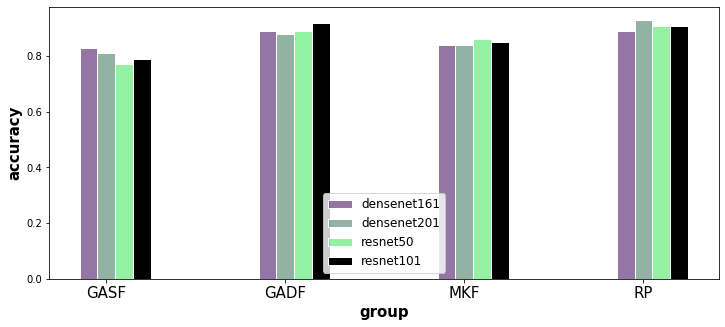

In [33]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
    
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)

# set width of bar
barWidth = 0.1
 
# set height of bar
bars1 = [0.83, 0.89, 0.84, 0.89]
bars2 = [0.81, 0.88, 0.84, 0.93]
bars3 = [0.77, 0.89, 0.86, 0.91]
bars4 = [0.79, 0.92, 0.85, 0.91]

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Make the plot
ax.bar(r1, bars1, color=(0.3,0.1,0.4,0.6), width=barWidth, edgecolor='white', label='densenet161')
ax.bar(r2, bars2, color=(0.3,0.5,0.4,0.6), width=barWidth, edgecolor='white', label='densenet201')
ax.bar(r3, bars3, color=(0.3,0.9,0.4,0.6), width=barWidth, edgecolor='white', label='resnet50')
ax.bar(r4, bars4, color='black', width=barWidth, edgecolor='white', label='resnet101')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.ylabel('accuracy', fontweight = 'bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['GASF', 'GADF', 'MKF', 'RP'])

ax.xaxis.label.set_fontsize(15)
ax.yaxis.label.set_fontsize(15)
ax.xaxis.set_tick_params(labelsize = 15)
 
# Create legend & Show graphic
ax.legend(fontsize = 12)
fig.savefig('plot.png')

***
#### Tables

Gramian Angular Summation Field

          model best val acc best val loss training acc training loss
0   densenet161     0.827839      0.633519     0.993132     0.0366975
1     resnet152     0.826007      0.690557     0.995879     0.0258854
2   densenet169     0.818681       0.70353     0.993132      0.029269
3      resnet34     0.811355       0.80769     0.995421     0.0175232
4      resnet18     0.809524      0.881107      0.99359     0.0218048
5   densenet201     0.807692      0.813463     0.990842     0.0341137
6   densenet121     0.804029      0.717805     0.986264     0.0579804
7     googlenet     0.791209      0.826886     0.989927     0.0526342
8     resnet101     0.791209      0.744109     0.992674     0.0240675
9      resnet50     0.771062      0.811559     0.962454      0.120791
10        vgg11     0.705128       0.97788     0.919414      0.293853
11        vgg13     0.694139      0.998538      0.93544      0.254939
12        vgg16     0.684982       1.17172     0.912088      0.306161
13      alexnet     

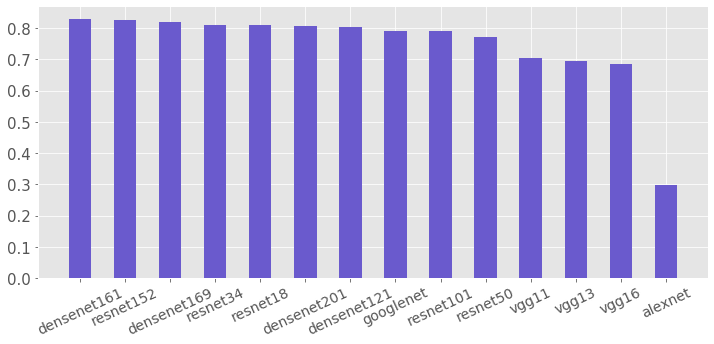

In [128]:
table = buildTable('gasf', 'cca128')
print(table)
barPlot(table)

Gramian Angular Difference Field

          model best val acc best val loss training acc training loss
0     resnet101     0.917582      0.329729     0.967949      0.090146
1   densenet121     0.897436      0.435695     0.951465      0.143401
2      resnet50      0.89011      0.496183     0.961081      0.108947
3   densenet161     0.888278       0.49315     0.967949     0.0858713
4     resnet152     0.886447      0.507931     0.945513       0.15068
5         vgg16     0.886447      0.528063            1    0.00250183
6      resnet18     0.882784      0.460203     0.937271      0.191239
7         vgg11     0.880952       0.59906            1     0.0017963
8   densenet201     0.879121      0.410854     0.988553     0.0481278
9         vgg13     0.875458      0.588328            1    0.00176361
10  densenet169     0.873626      0.509354     0.975275     0.0730006
11     resnet34     0.869963       0.51394     0.940018      0.166938
12      alexnet     0.846154      0.697092     0.983059     0.0732371
13    googlenet     

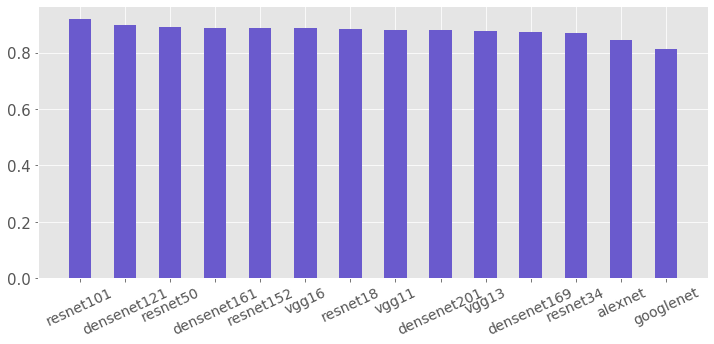

In [9]:
table = buildTable('gadf', 'cca128')
print(table)
barPlot(table)

Markov Transition Field

          model best val acc best val loss training acc training loss
0      resnet50     0.858974      0.535251     0.959707      0.126896
1     resnet152      0.85348      0.506846      0.97619     0.0732437
2     resnet101     0.847985       0.59423      0.94185      0.174765
3      resnet34     0.847985      0.615733     0.973901      0.073669
4   densenet161     0.846154        0.5603     0.975733     0.0766509
5         vgg13     0.846154      0.658233            1    0.00224805
6   densenet169     0.836996      0.650034     0.968864     0.0972165
7         vgg11     0.836996       0.64604            1    0.00327388
8   densenet201     0.835165      0.579437     0.937271      0.176042
9   densenet121      0.82967      0.754004     0.954212      0.130154
10     resnet18     0.800366      0.811905     0.930861       0.18137
11        vgg16     0.772894      0.916646     0.994963      0.032558
12    googlenet     0.750916      0.824568     0.947802      0.154737
13      alexnet     

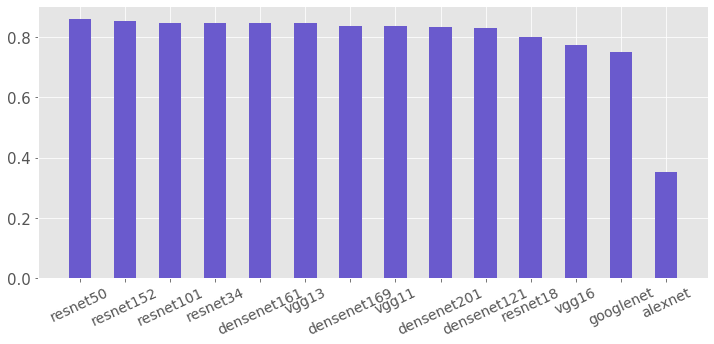

In [121]:
table = buildTable('mtf', 'cca128')
print(table)
barPlot(table)

Recurrence Plot

          model best val acc best val loss training acc training loss
0   densenet201     0.930403      0.302694     0.968407     0.0934627
1     resnet101     0.913919      0.310003     0.969322     0.0964924
2      resnet50     0.906593      0.337613     0.939103      0.160411
3   densenet169      0.90293      0.357121     0.925366      0.204712
4     resnet152      0.90293       0.37899     0.973443     0.0752569
5         vgg11     0.899267      0.434172     0.999542     0.0171586
6   densenet121     0.895604      0.411536     0.961996      0.107272
7   densenet161     0.893773      0.386786     0.965201      0.103779
8      resnet18     0.893773      0.446314      0.96978     0.0814311
9      resnet34     0.884615      0.437224     0.975733     0.0660699
10    googlenet     0.864469      0.508903     0.966575     0.0964434
11        vgg13     0.269231       1.57297     0.223901       1.60127
12        vgg16     0.245421       1.59509     0.232143       1.61789
13      alexnet     

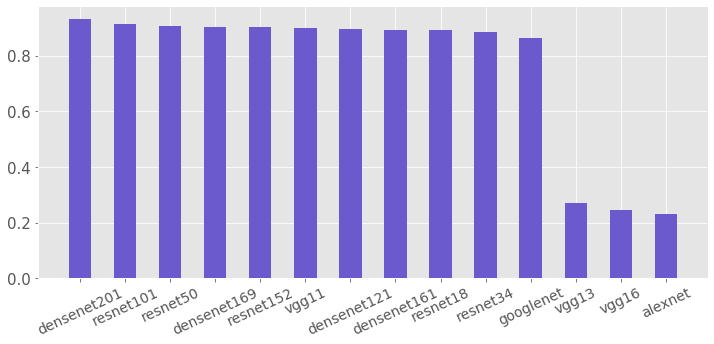

In [122]:
table = buildTable('rp', 'cca128')
print(table)
barPlot(table)

### Mixed Methods

Four

          model best val acc best val loss training acc training loss
0     resnet152     0.769231      0.757494     0.994048     0.0543933
1   densenet161     0.767399      0.718606     0.997711     0.0521117
2   densenet201     0.754579      0.769702     0.994963     0.0681629
3      resnet18     0.749084      0.798892     0.977106      0.286049
4   densenet169      0.74359      0.723409     0.989927      0.094396
5   densenet121     0.727106      0.768316     0.973901      0.216466
6      resnet34     0.716117      0.835528     0.997711     0.0861573
7         vgg11      0.70696      0.945521     0.870421       0.38162
8      resnet50     0.705128      0.840321     0.999542     0.0729553
9     resnet101     0.694139      0.915461     0.999084     0.0461044
10        vgg13     0.684982       1.02743     0.811355      0.504707
11    googlenet      0.68315      0.935635     0.908425      0.437548
12        vgg16     0.553114        1.2174     0.747253       0.68118
13      alexnet     

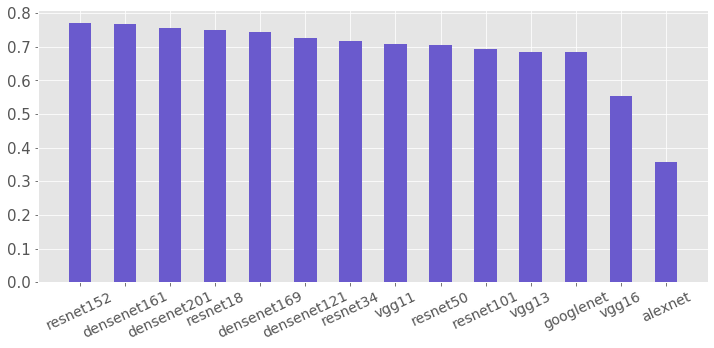

In [5]:
table = buildTable('four', 'cca128')
print(table)
barPlot(table)

Three

          model best val acc best val loss training acc training loss
0   densenet169     0.657509      0.962333     0.983974      0.185346
1   densenet161     0.655678       1.04357     0.995421     0.0840372
2     resnet101     0.650183        1.0173     0.997711      0.107881
3     resnet152     0.650183       0.98569     0.963828      0.238156
4   densenet201     0.648352       1.07102       0.9913      0.139176
5      resnet50      0.64652       1.09967            1     0.0309052
6      resnet34     0.642857       1.07861     0.996337      0.164842
7      resnet18     0.641026       1.03404     0.967033       0.30553
8   densenet121       0.6337       1.07163     0.956502      0.289546
9     googlenet       0.6337       1.10182     0.891026      0.506515
10        vgg13     0.285714        1.5784     0.255037       1.58065
11        vgg11     0.276557        1.5823     0.250458       1.58273
12        vgg16      0.24359       1.59808     0.239927       1.60684
13      alexnet     

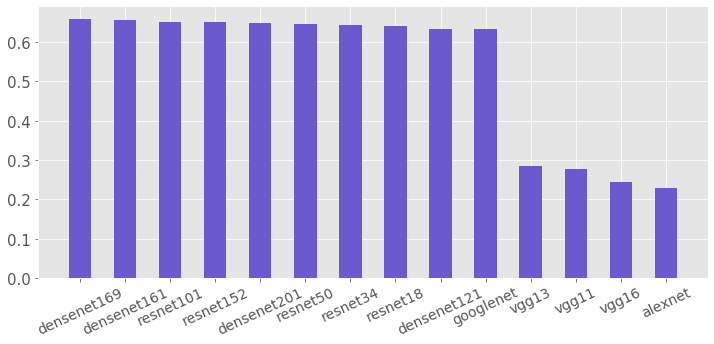

In [7]:
table = buildTable('three', 'cca128')
print(table)
barPlot(table)

Two

          model best val acc best val loss training acc training loss
0   densenet169     0.871795      0.512301     0.961081      0.141481
1     resnet152     0.847985      0.536551     0.970238      0.117721
2   densenet161     0.840659      0.563744     0.962454      0.125955
3   densenet121     0.827839      0.543591     0.940018      0.200344
4   densenet201     0.827839      0.548382     0.970696         0.117
5      resnet50     0.820513      0.558122     0.990385     0.0628418
6     resnet101     0.809524      0.552362     0.983059     0.0768502
7      resnet34      0.79304      0.664934     0.987637     0.0982268
8     googlenet     0.765568      0.705496     0.981227      0.156455
9      resnet18     0.765568      0.661673     0.990385      0.136088
10      alexnet     0.285714       1.57799     0.310897        1.5211


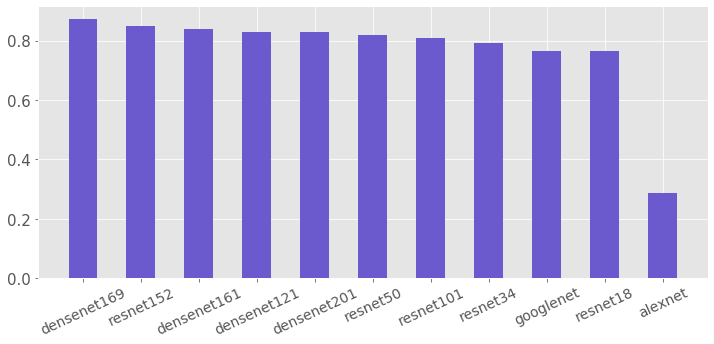

In [8]:
table = buildTable('two', 'cca128')
print(table)
barPlot(table)

***

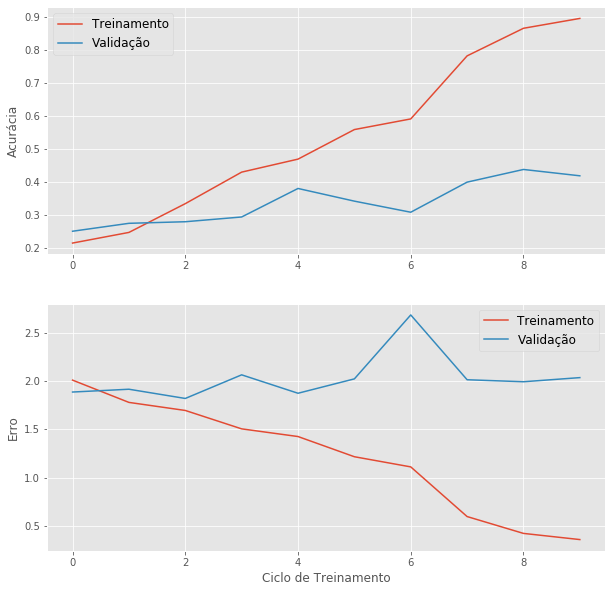

In [24]:
plt.style.use('ggplot')
fig, axs = plt.subplots(nrows = 2, ncols = 1)

fig.set_size_inches(10, 10)
fig.subplots_adjust(hspace = 0.2)
size = len(Training[0])

axs[0].plot(range(size), Training[0], label = 'Treinamento'); axs[1].plot(range(size), Training[1], label = 'Treinamento')
axs[0].plot(range(size), Validation[0], label = 'Validação'); axs[1].plot(range(size), Validation[1], label = 'Validação')

axs[1].set(xlabel = 'Ciclo de Treinamento')
axs[0].set(ylabel = 'Acurácia')
axs[1].set(ylabel = 'Erro')
axs[0].legend(fontsize = 12)
axs[1].legend(fontsize = 12)

fig.savefig('figure.png')

512
64
Max Train Accuracy: 0.9995421245421245 - Max Val Accuracy: 0.7362637362637363
96
Max Train Accuracy: 1.0 - Max Val Accuracy: 0.7435897435897436
128
Max Train Accuracy: 1.0 - Max Val Accuracy: 0.7637362637362637
160
Max Train Accuracy: 1.0 - Max Val Accuracy: 0.782051282051282
192
Max Train Accuracy: 1.0 - Max Val Accuracy: 0.7912087912087912
224
Max Train Accuracy: 0.9981684981684982 - Max Val Accuracy: 0.7747252747252747
256
Max Train Accuracy: 0.9995421245421245 - Max Val Accuracy: 0.7637362637362637
288
Max Train Accuracy: 0.9995421245421245 - Max Val Accuracy: 0.7710622710622711


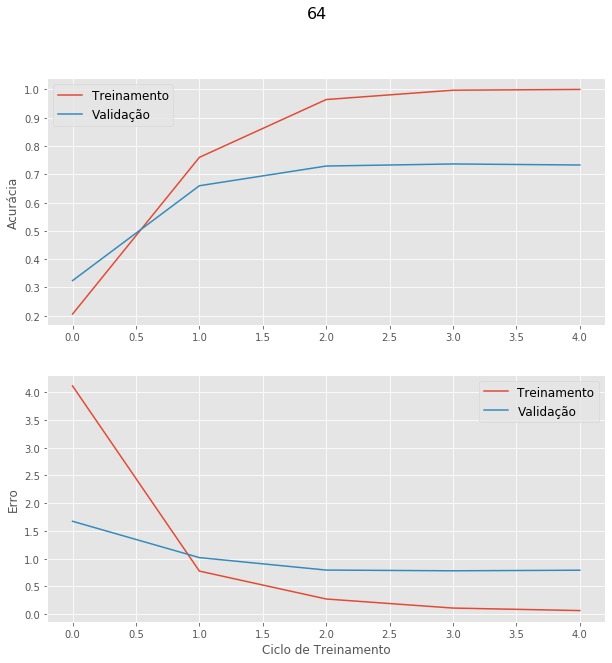

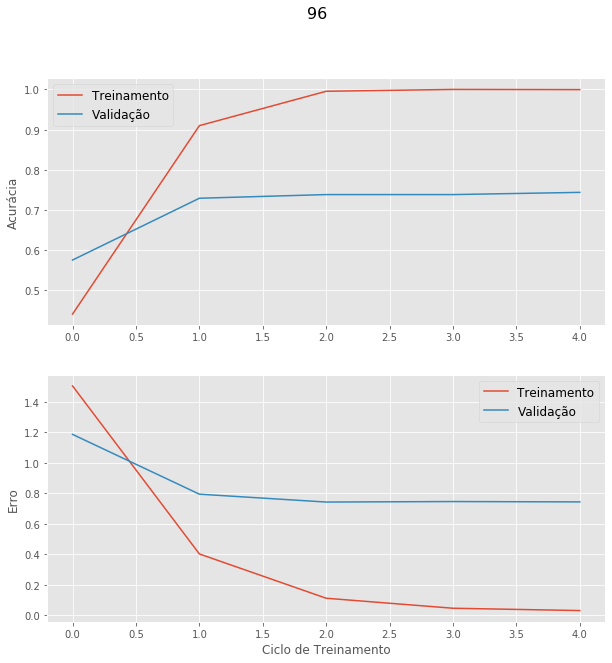

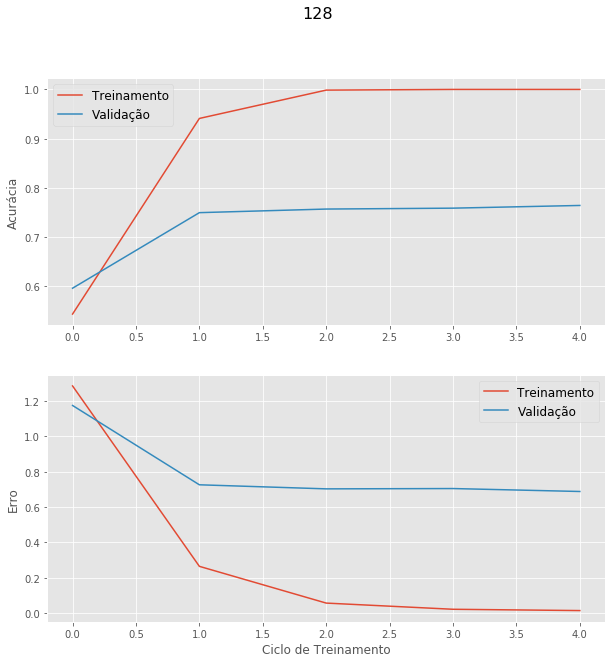

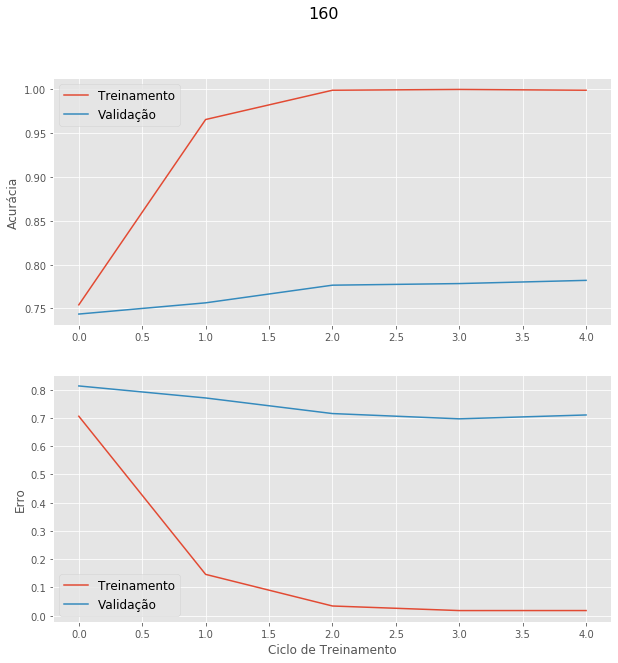

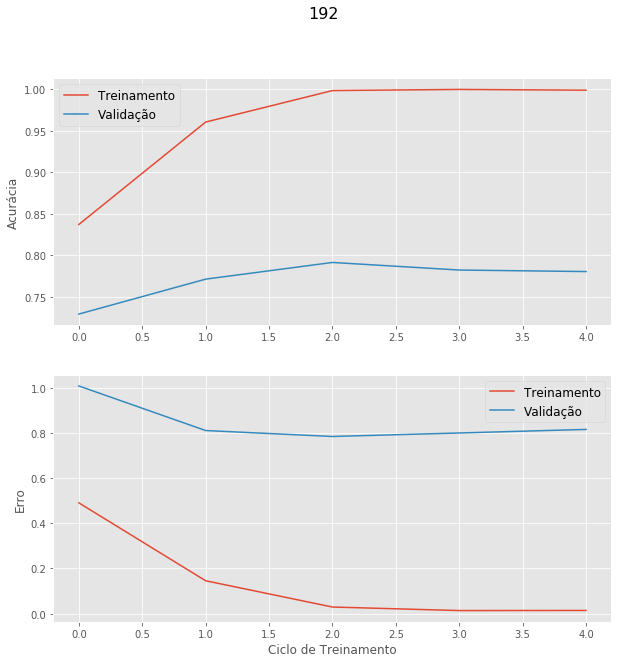

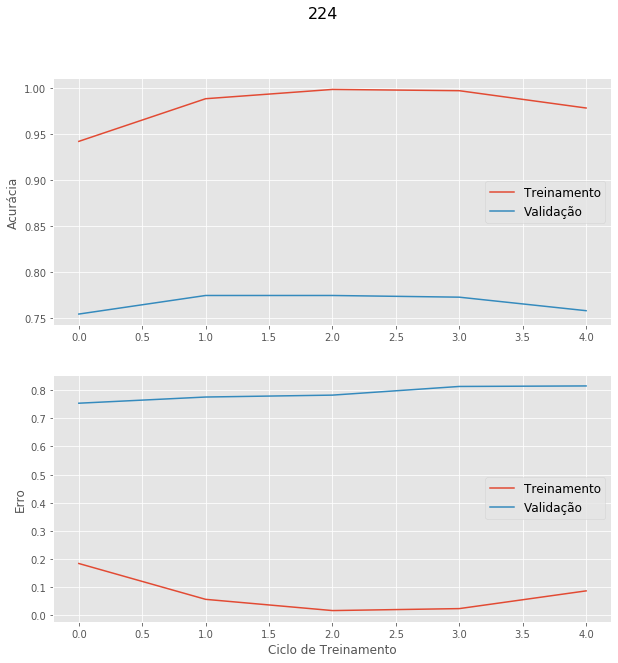

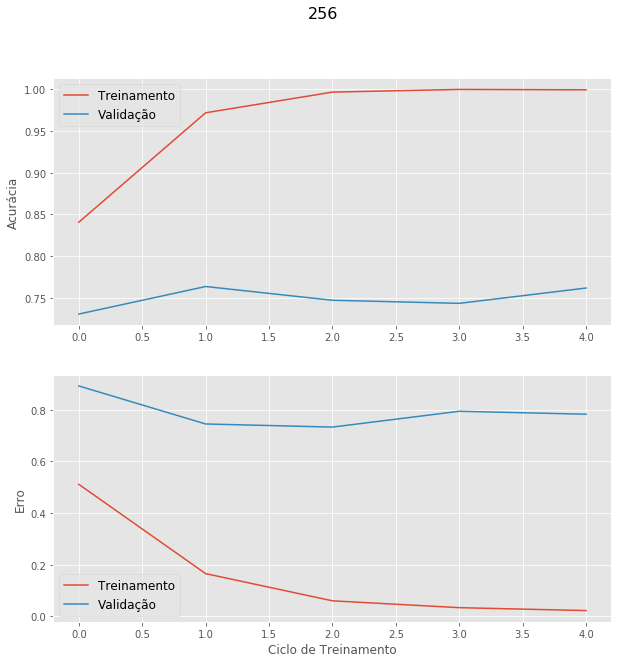

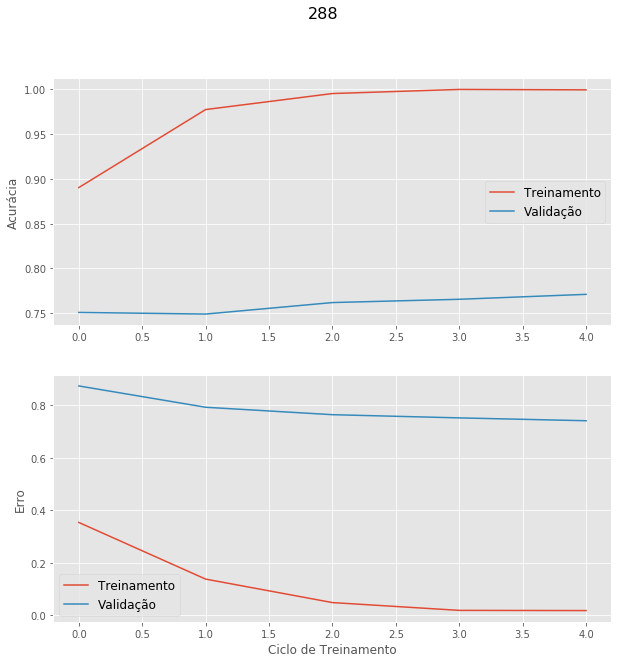

In [7]:
plt.style.use('ggplot')
folder = 'cca'
dataType = '512'
size = ['64' ,'96', '128', '160', '192', '224', '256', '288']

print(dataType)
for k in size:
    path = 'Models\\resnet34\\'+folder+k+'\\stats'+dataType+".pth"
    stats = torch.load(path)[dataType]
    trainAcc = stats[0][0]
    valAcc = stats[1][0]
    trainLoss = stats[0][1]
    valLoss = stats[1][1]
    
    for i in range(len(trainAcc)):
        trainAcc[i]  = trainAcc[i].item() 
        valAcc[i] = valAcc[i].item()
    
    print(k)
    print("Max Train Accuracy: {} - Max Val Accuracy: {}".format(max(trainAcc), max(valAcc)))
    
    fig, axs = plt.subplots(nrows = 2, ncols = 1)      
    fig.set_size_inches(10, 10)
    fig.subplots_adjust(hspace = 0.2)
    size = len(trainAcc)
    
    axs[0].plot(range(size), trainAcc, label = 'Treinamento')
    axs[1].plot(range(size), trainLoss, label = 'Treinamento')
    axs[0].plot(range(size), valAcc, label = 'Validação')
    axs[1].plot(range(size), valLoss, label = 'Validação')
        
    axs[1].set(xlabel = 'Ciclo de Treinamento')
    axs[0].set(ylabel = 'Acurácia')
    axs[1].set(ylabel = 'Erro')
    axs[0].legend(fontsize = 12)
    axs[1].legend(fontsize = 12)
    
    fig.suptitle(k, fontsize = 16)
    
    fig.savefig('figure'+folder+k+'.png')

***

Raw Time Series

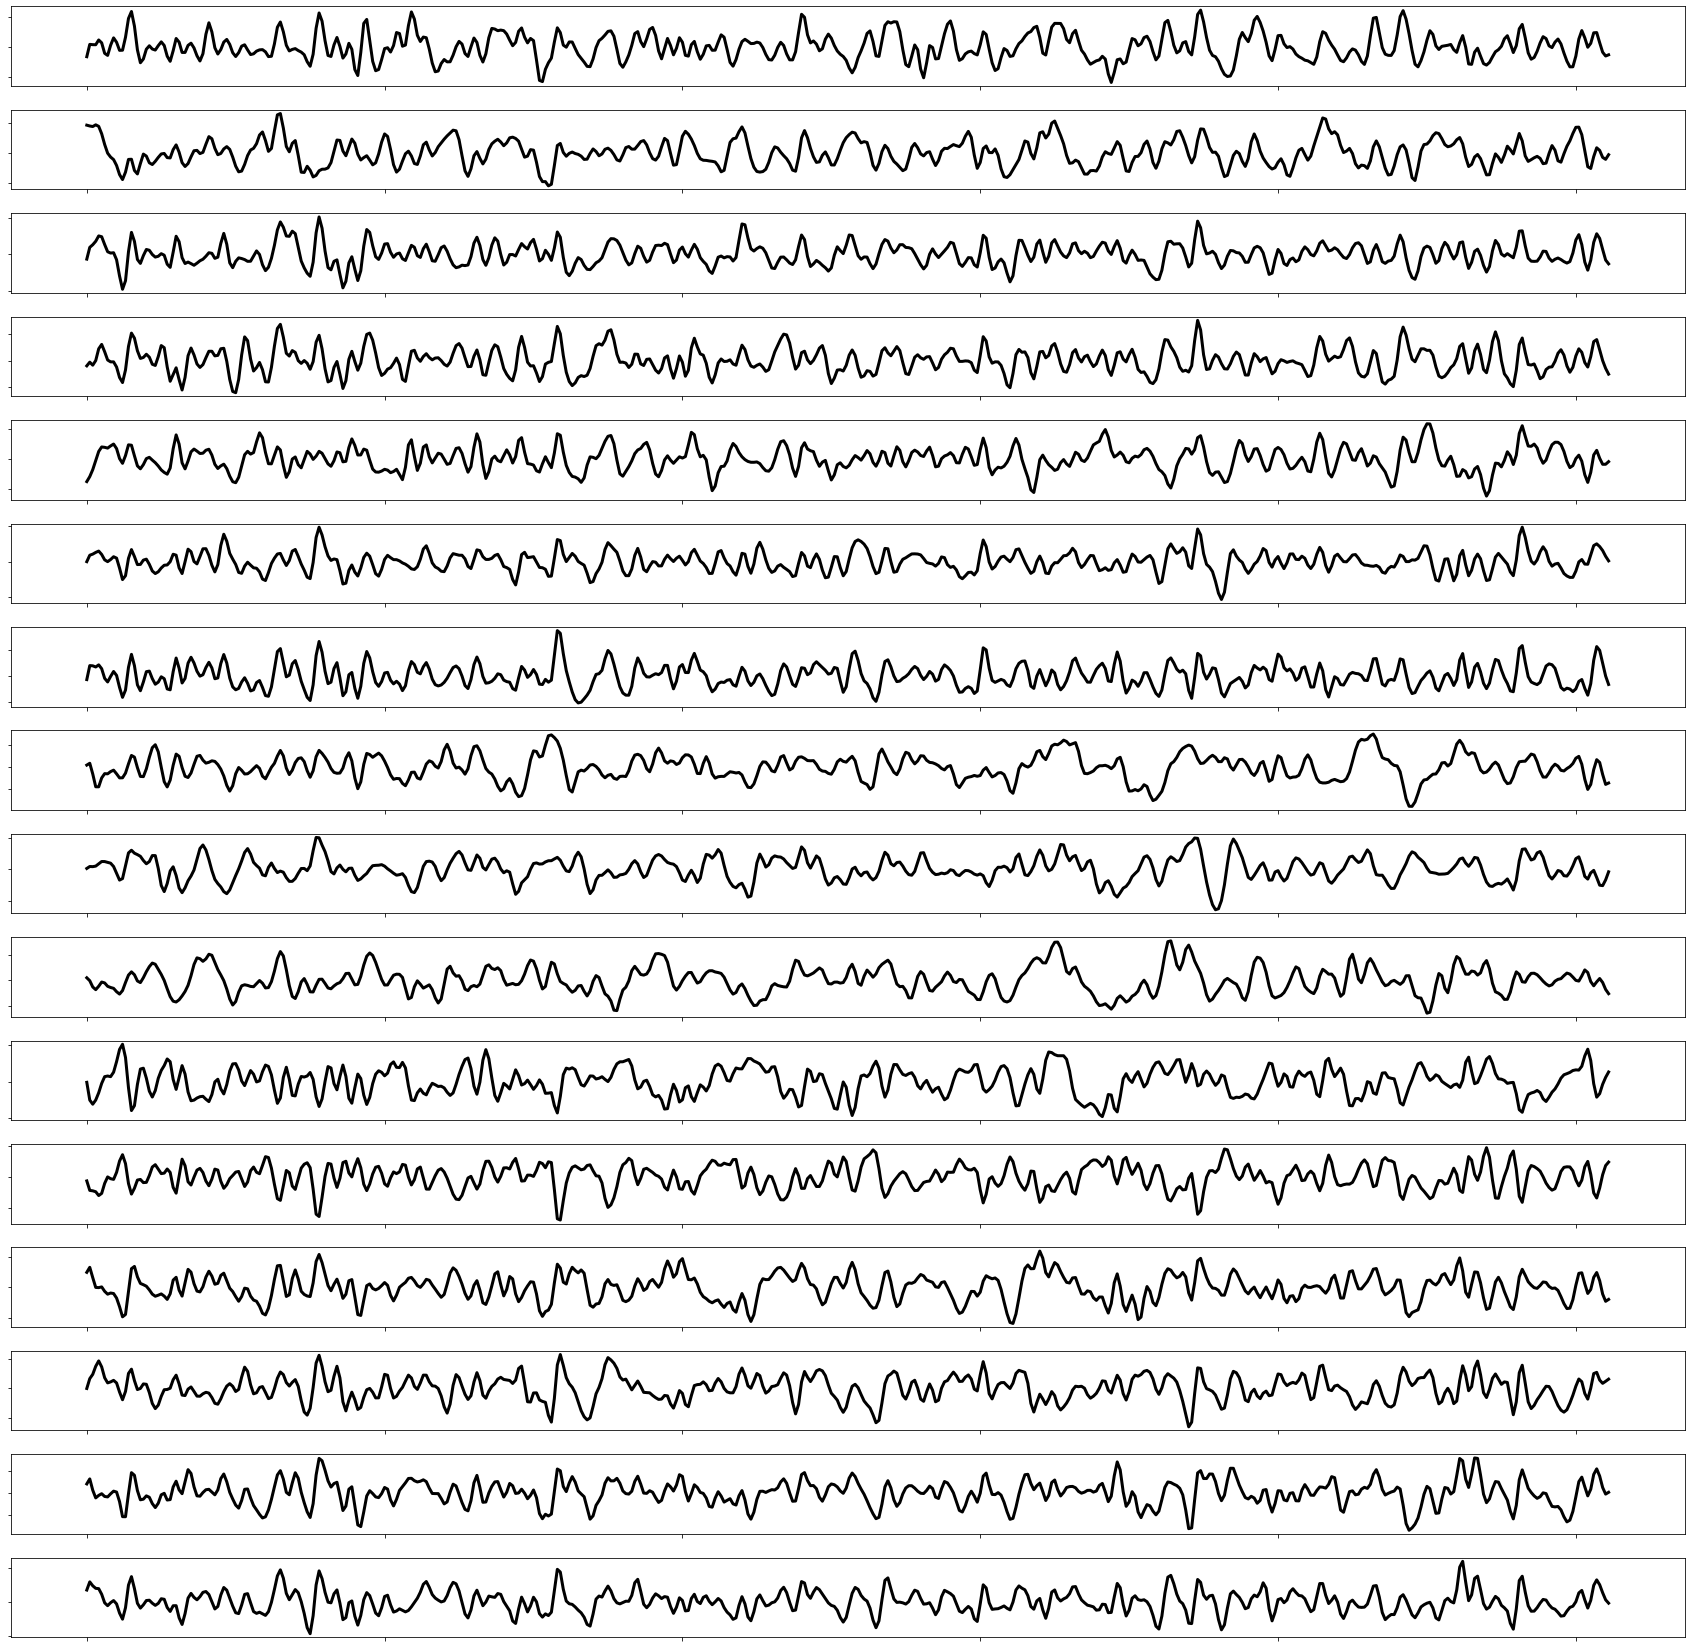

In [50]:
individual = '0179520170504'
dataPath = 'C:\\Users\\Patrick\\Documents\\GitHub\\ICDeepLearning\\Data\\Originais_CCA\\512\\'+individual+'\\1\\1.csv'
data = pd.read_csv(dataPath, header = None)

fig, axs = plt.subplots(nrows = 16, ncols = 1)
fig.set_size_inches(30, 30)
fig.subplots_adjust(hspace = 0.3)

for ax in axs:
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    
for eletrode in range(16):
    series = data.loc[:][eletrode]
    axs[eletrode].plot(series, color = 'k', linewidth = 3)
    
fig.savefig('eletrodes.png')
